In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from scipy.stats import loguniform
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

### Read Dataset

In [ ]:
# Read the Data Set
path = 'df_faults_even.xlsx'

DF_faulty = pd.read_excel(path, index_col=0)
df_filtered = DF_faulty

In [3]:
# Prepare the data
X = df_filtered.drop(columns=['Datetime', 'Fault'])
y = df_filtered['Fault']

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


### RFECV

In [ ]:
import time
from sklearn.feature_selection import RFECV

lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1, verbosity=-1)

pipeline = Pipeline([
('scaler', StandardScaler()),
('model', lgbm_model)
])

# RFECV
min_features_to_select = 1
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
estimator=pipeline,
step=1,
cv=cv,
scoring='f1_macro',
min_features_to_select=1,
n_jobs=-1,
importance_getter='named_steps.model.feature_importances_',
verbose=2
)

# Fit RFECV and Time
start_time = time.time()
rfecv.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"RFECV fitting completed in {elapsed_time:.2f} seconds")

Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estima

The optimal number of features found by RFECV is 42.
The corresponding F1 Macro Score is 0.7948404580476529.


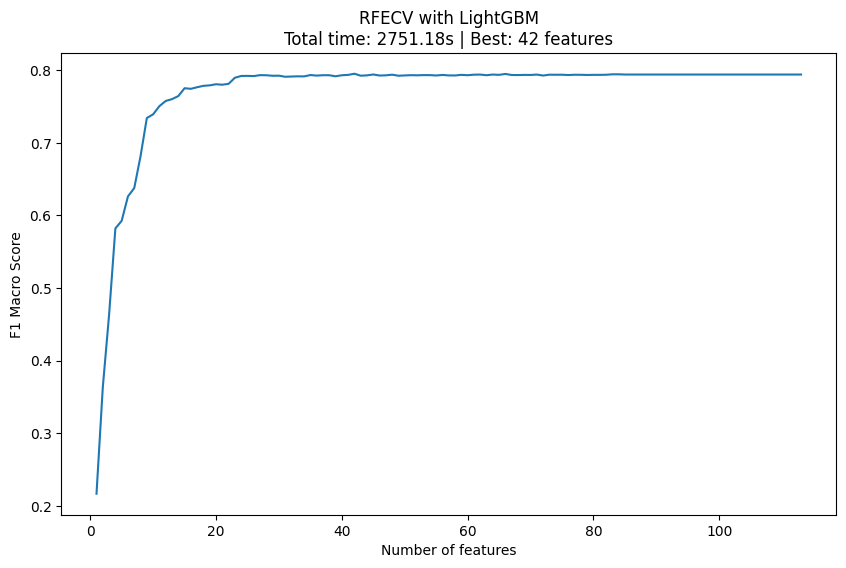

In [ ]:
# Maximum F1 score
optimal_num_features = rfecv.n_features_
optimal_f1_score = max(rfecv.cv_results_['mean_test_score'])
print(f"The optimal number of features found by RFECV is {optimal_num_features}.")
print(f"The corresponding F1 Macro Score is {optimal_f1_score}.")

# Plot Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
         rfecv.cv_results_['mean_test_score'])

plt.xlabel("Number of features")
plt.ylabel("F1 Macro Score")
plt.title('RFECV with LightGBM\n'
          f'Total time: {elapsed_time:.2f}s | Best: {optimal_num_features} features')
plt.show()
